# **Clustering - Grupo 03**

## **Authors**

- César López Mantecón - 100472092
- Manuel Gómez-Plana Rodríguez - 100472310



## **Repositorio**

Esta práctica se ha llevado a cabo en este [repositorio de github](https://github.com/ManuGPR/AA_P2_G03.git)

## **Introducción**

En este cuaderno se resolverá un problema de clustering usando un dataset de estrellas.

# **Carga de dataset**

## **Carga del dataset por drive**

In [13]:
# Para ejecutar el cuaderno en drive
#from google.colab import drive
#import pandas as pd

#drive.mount('/content/drive')
#stars = pd.read_csv("/content/drive/MyDrive/stars_datkmeans_casero.csv") # acceder al csv en drive

## **Carga del dataset en local**

In [14]:
import pandas as pd
stars = pd.read_csv("stars_data.csv")

# **1. Dataset**
Este apartado contiene tanto la descripción del dataset como las transformaciones que tendremos que ejecutar antes de trabajar con él.

## **1.1. Descripción del dataset**
Como podemos ver en la salida del código, contamos con un dataset de 240 instancias y 6 características. De estas 6 características, 4 son numéricas y 2 son categóricas.

In [15]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.4+ KB


## **1.2. Transformación de las variables categóricas**
Como se puede observar en la salida del siguiente código, existe un problema con los valores del atributo color. Para esta columna, existen valores que deberían ser iguales, como se puede ver en tipos como "Blue white", "Blue-white" y "Blue-White". Estos valores deberían ser iguales, pero difieren en una mayúscula o en un guión solamente.

In [16]:
stars.Color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

Para arreglarlo, usaremos el siguiente fragmento de código. En él, hacemos un mapeado, donde agrupamos las distintas formas de escribir un valor en una única, para luego sustituir los valores por estas clases mapeadas.

In [17]:
# Mapeado de colores
mapping = {
  "Red": ["Red"],
  "Orange-Red": ["Orange-Red"],
  "Orange": ["Orange"],
  "Yellow-Orange": ["Pale yellow orange"],
  "Yellow": ["yellowish", "Yellowish"],
  "White-Yellow": ["Yellowish White", "yellow-white", "White-Yellow"],
  "White": ["White", "Whitish", "white"],
  "Blue-White": ["Blue White", "Blue white", "Blue-white", "Blue-White"],
  "Blue": ["Blue"],
}

# Cambiamos los colores
for target, source in mapping.items():
  stars.loc[stars.Color.isin(source), 'Color'] = target

stars.Color.unique()

array(['Red', 'Blue-White', 'White', 'White-Yellow', 'Yellow-Orange',
       'Blue', 'Orange', 'Yellow', 'Orange-Red'], dtype=object)

# **3. Conversión de variables categóricas**
En este apartado se muestran dos maneras de transformar las variables categóricas a variables numéricas. Empezaremos por one-hot encoding, y luego seguiremos con una codificación ordinal.

## **3.1. One-Hot Encoding**
CAMBIAR LOS ATRIBUTOS COLOR EN EL DATASET ORIGINAL


La primera manera es hacer un One-Hot Encoding, que es parecido a una transformación a un mapa de bits.

In [18]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Crea el preprocesador
cat_transformer = Pipeline(
  steps= [
    ('onehot', OneHotEncoder())
  ])

# Se crea el transformador
preprocessor = ColumnTransformer(
    transformers = [
      ('cat', cat_transformer, ["Color","Spectral_Class"]),
    ],
    remainder = 'passthrough')
onehot_stars = preprocessor.fit_transform(stars)

# Se consiguen los nombres de las columnas
cat_columns_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(input_features=["Color", "Spectral_Class"])
all_columns_names = list(cat_columns_names) + ["Temperature", "L", "R", "A_M"]

# Se consigue el dataframe transformado
onehot_df = pd.DataFrame(onehot_stars, columns=all_columns_names)
onehot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Color_Blue           240 non-null    float64
 1   Color_Blue-White     240 non-null    float64
 2   Color_Orange         240 non-null    float64
 3   Color_Orange-Red     240 non-null    float64
 4   Color_Red            240 non-null    float64
 5   Color_White          240 non-null    float64
 6   Color_White-Yellow   240 non-null    float64
 7   Color_Yellow         240 non-null    float64
 8   Color_Yellow-Orange  240 non-null    float64
 9   Spectral_Class_A     240 non-null    float64
 10  Spectral_Class_B     240 non-null    float64
 11  Spectral_Class_F     240 non-null    float64
 12  Spectral_Class_G     240 non-null    float64
 13  Spectral_Class_K     240 non-null    float64
 14  Spectral_Class_M     240 non-null    float64
 15  Spectral_Class_O     240 non-null    flo

## **3.2. Codificación ordinal**

In [19]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# forzar un orden entre categorías y calor
color_categories = ["Red", "Orange-Red", "Orange", "Yellow-Orange", "Yellow", "White-Yellow", "White", "Blue-White", "Blue"]
spectral_categories = ["M", "K", "G", "F", "A", "B", "O"]

# Creamos una instancia de OrdinalEncoder para cada columna que queremos codificar
ordinal_encoder = Pipeline([
    ('ordinal_encoding', OrdinalEncoder(categories=[color_categories, spectral_categories]))
])

# Definimos las columnas que queremos codificar
columns_to_encode = ["Color", "Spectral_Class"]

# Creamos un ColumnTransformer para aplicar el encoder a las columnas seleccionadas
column_transformer = ColumnTransformer(
    transformers = [
      ('ord', ordinal_encoder, columns_to_encode),
    ],
    remainder = 'passthrough')
# Aplicamos la pipeline al DataFrame
ordinal_encoded_data = column_transformer.fit_transform(stars)

ord_columns_names = column_transformer.named_transformers_['ord']['ordinal_encoding'].get_feature_names_out(input_features=["Color", "Spectral_Class"])
all_columns_names = list(ord_columns_names) + ["Temperature", "L", "R", "A_M"]

# Convertimos el resultado a un DataFrame
ordinal_encoded_df = pd.DataFrame(ordinal_encoded_data, columns=all_columns_names)

# Ver los resultados
ordinal_encoded_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Color           240 non-null    float64
 1   Spectral_Class  240 non-null    float64
 2   Temperature     240 non-null    float64
 3   L               240 non-null    float64
 4   R               240 non-null    float64
 5   A_M             240 non-null    float64
dtypes: float64(6)
memory usage: 11.4 KB


## **2.2. PCA**
**PROBABLEMENTE HAYA QUE MOVERLO DEBAJO PARA PODER HACER EL PCA CON VARIABLES CATEGÓRICAS TRANsFORMADAS.**

Para poder realizar correctamente la comparación entre nuestro K_Means y el K_means implementado de `scikit-learn`, primero deberemos aplicar una reducción de dimensionalidad sobre el data-set. Para ello, usaremos PCA.

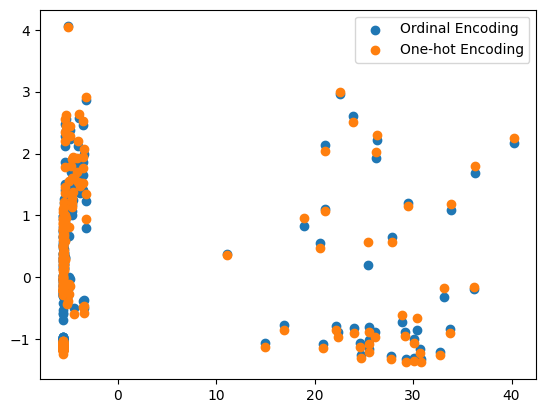

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       240 non-null    float64
 1   1       240 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)

# Escalado de datos 
decepticom = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=2))
])

##### 

pca_ord_stars = pd.DataFrame(decepticom.fit_transform(ordinal_encoded_df))
pca_ohe_stars = pd.DataFrame(decepticom.fit_transform(onehot_df))
labels = ['Ordinal Encoding', 'One-hot Encoding']
plt.scatter(pca_ord_stars.iloc[:,0], pca_ord_stars.iloc[:, 1], label=labels[0])
plt.scatter(pca_ohe_stars.iloc[:,0], pca_ohe_stars.iloc[:, 1], label=labels[1])

# Añadimos una leyenda
plt.legend()

# Mostramos el plot
plt.show()

pca_ohe_stars.info()

# **2. K-Means**
En este apartado, se cubre una implementación propia del algoritmo K-Means, el cuál compararemos luego con el algoritmo de `scikit-learn`.

## **2.1. MyK_Means**
Primero, debemos realizar una implementación propia del K-Means, la cual llamaremos MyK_Means.

iteraciones:  3


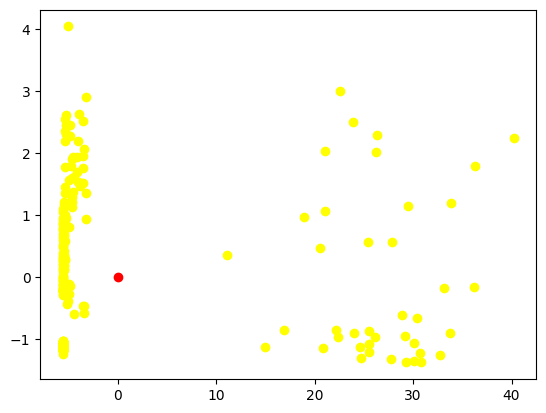

>>> <class 'numpy.int32'>
>>> [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
>>> [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 7 7 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 6 0 0 7 8 1 5 4 1 1 4 1 3 8 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 7 7 0 7 7 7 7 7 1
 5 4 8 8 1 8 3 8 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0
 0 0 7 0 0 0 0 0 0 0 0 7 7 7 7 7 7 0 7 7 7 7 8 8 1 4 5 8 5 4 3 5 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 0 0 0 0 7 7
 7 7 7 7 7 7 7 7 8 1 2 1 5 1

'\nclass MyK_Means:\n  def __init__(self, k: int, data: pd.DataFrame):\n    # Número de clusters\n    self.k = k\n\n    # Datos sobre los que trabajar\n    self.data = data\n\n    # Lista con centroides, index del centroide = value del centroide\n    self.centroids = []\n\n    # Lista con los clusters, index del centroide = lista con instancias de esos clusters\n    self.past_clusters = []\n    self.clusters = []\n\n    self.init_cluster()\n    self.init_centroid()\n\n  def init_cluster(self):\n    for key in range(self.k):\n      self.clusters.append(pd.DataFrame(columns=self.data.columns))\n\n  def init_centroid(self):\n    list_min = self.data.min().to_list()\n    list_max = self.data.max().to_list()\n\n    for key in range(self.k):\n      centroid_list = []\n      for column in range(len(self.data.columns)):\n        centroid_list.append(random()*(list_max[column] - list_min[column]) + list_min[column])\n      self.centroids.append(tuple(centroid_list))\n\n  def calculate_closest_c

In [21]:

from kmeans import MyK_Means
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score






kmeans_casero = MyK_Means(9, pca_ohe_stars)
kmeans = KMeans(9)
cluster_labels = kmeans.fit_predict(pca_ohe_stars)
print("iteraciones: ", kmeans_casero.fit())
plt.scatter(kmeans_casero.clusters[0].iloc[0: , 0], kmeans_casero.clusters[0].iloc[0:, 1], color="yellow", label="datos")
plt.scatter(kmeans_casero.clusters[1].iloc[0: , 0], kmeans_casero.clusters[1].iloc[0:, 1], color="blue", label="datos")
#plt.scatter(kmeans_casero.clusters[2].iloc[0: , 0], kmeans_casero.clusters[2].iloc[0:, 1], color="green", label="datos")
plt.scatter(*zip(*kmeans_casero.centroids), color="red", label="destacados")
plt.show()
print(">>>", kmeans_casero.cluster_labels)
print(">>>", cluster_labels)

silhouette_avg1 = silhouette_score(pca_ohe_stars, cluster_labels)
silhouette_avg2 = silhouette_score(pca_ohe_stars, cluster_labels)

print(silhouette_avg1, silhouette_avg2)


"""plt.scatter(kmeans_casero.clusters[3].iloc[0: , 0], kmeans_casero.clusters[3].iloc[0:, 1], color="purple", label="datos")
plt.scatter(kmeans_casero.clusters[4].iloc[0: , 0], kmeans_casero.clusters[4].iloc[0:, 1], color="black", label="datos")
plt.scatter(kmeans_casero.clusters[5].iloc[0: , 0], kmeans_casero.clusters[5].iloc[0:, 1], color="brown", label="datos")
plt.scatter(kmeans_casero.clusters[6].iloc[0: , 0], kmeans_casero.clusters[6].iloc[0:, 1], color="pink", label="datos")
plt.scatter(kmeans_casero.clusters[7].iloc[0: , 0], kmeans_casero.clusters[7].iloc[0:, 1], color="orange", label="datos")
plt.scatter(kmeans_casero.clusters[8].iloc[0: , 0], kmeans_casero.clusters[8].iloc[0:, 1], color="violet", label="datos")
plt.scatter(kmeans_casero.clusters[9].iloc[0: , 0], kmeans_casero.clusters[9].iloc[0:, 1], color="gray", label="datos")"""


"""
class MyK_Means:
  def __init__(self, k: int, data: pd.DataFrame):
    # Número de clusters
    self.k = k

    # Datos sobre los que trabajar
    self.data = data

    # Lista con centroides, index del centroide = value del centroide
    self.centroids = []

    # Lista con los clusters, index del centroide = lista con instancias de esos clusters
    self.past_clusters = []
    self.clusters = []

    self.init_cluster()
    self.init_centroid()

  def init_cluster(self):
    for key in range(self.k):
      self.clusters.append(pd.DataFrame(columns=self.data.columns))

  def init_centroid(self):
    list_min = self.data.min().to_list()
    list_max = self.data.max().to_list()

    for key in range(self.k):
      centroid_list = []
      for column in range(len(self.data.columns)):
        centroid_list.append(random()*(list_max[column] - list_min[column]) + list_min[column])
      self.centroids.append(tuple(centroid_list))

  def calculate_closest_centroid(self, row):
    distances_cluster = []
    for key in range(len(self.centroids)):
      distances_cluster.append((self.calc_distance(self.centroids[key], row)))
    return distances_cluster.index(min(distances_cluster))

  def fit(self):
    it = 0
    while (True):
      it += 1
      self.past_clusters = []
      for n in range (self.k):
        self.past_clusters.append(self.clusters[n].copy(deep=True))
      self.clusters = []
      self.init_cluster()
      for row in range(len(self.data)):
        closest_centroid = self.calculate_closest_centroid(self.data.iloc[row, :])
        self.clusters[closest_centroid].loc[len(self.clusters[closest_centroid])] = self.data.iloc[row, :]
      self.recalculate_centroids()

      if (self.check_variation()):
        return it

  @staticmethod
  def calc_distance(vec1, vec2):
    return numpy.linalg.norm(vec1-vec2)

  def recalculate_centroids(self):
    self.centroids = []
    for index in range(len(self.clusters)):
      self.centroids.append(self.clusters[index].mean())

  def check_variation(self):
    for i in range(self.k):
      if not self.clusters[i].equals(self.past_clusters[i]):
        return False
    return True"""





## **2.3. Comparación**

Tras aplicar la transformación de datos, compararemos las implementaciones. Para poder compararlos justamente, es necesario que cuenten ambos con el mismo número de clusters.


>>> [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2 13 13 13
  2 13 13 13 13 13 10  2  2 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 10  3  1  7  5  1  1  5  1  9  3  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 13 13 13  2 13 13 13 13 13  2 13 13 13 13 13 13
 13 13 13 10 10 10 10  8  2  2  8  2  8  8  1  7  5  3  3  1  3  9  3  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13  2  2 13
 13 13 13 13 13 13 10 13 13  2  2  2  2  2 13 10  8  2  8  8  2  2  8 10
 10  2  3  3  1  5  7  3  7 11  4  7  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  2  2  2  2  2  2  2  2  2  2  2 13 13  2 10 10
 13  2  2 13 10  8  8  8  8  8  8 10  8  8  3 12 11  6  7 12  6 12  7 11] <class 'numpy.int32'>
>>> <class 'numpy.int32'>
>>> <class 'numpy.int32'>
>>> <class 'numpy.int32'>
>>> <class 'numpy.int32'>
>>> <class 'numpy.int32'>
>>> <class 'numpy.int32'>
>>> <class 'numpy.int32'>
>>> <class 'numpy.int32'>
>>> <class 'numpy.int32'>
>>> <clas

Text(0, 0.5, 'Media índices silhouette')

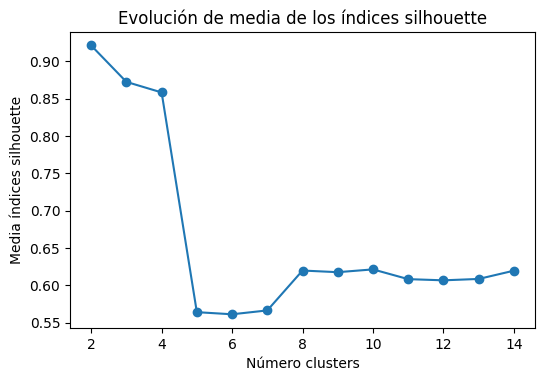

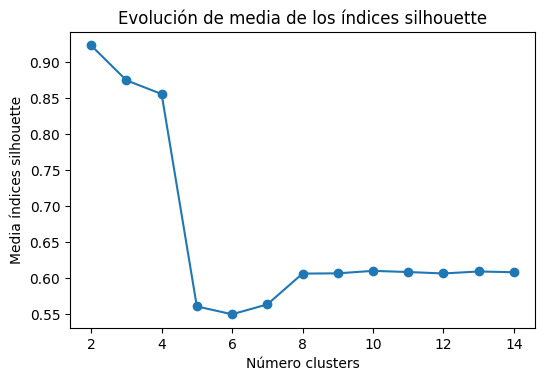

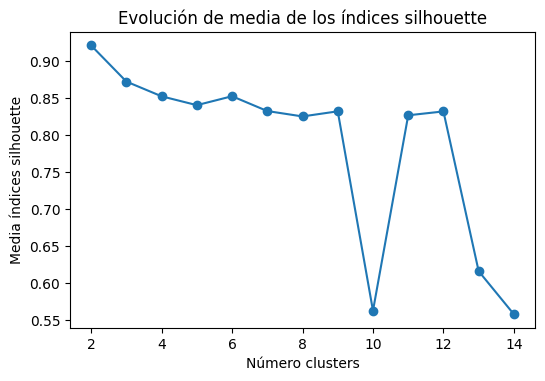

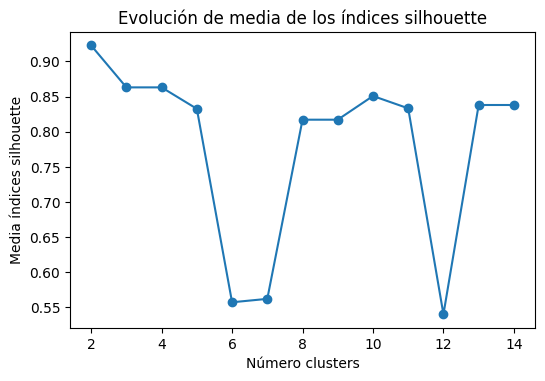

In [25]:
import numpy as np

# SKlearn ohe

range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 123
    )
    cluster_labels = modelo_kmeans.fit_predict(pca_ohe_stars)
    silhouette_avg = silhouette_score(pca_ohe_stars, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

print(">>>", cluster_labels, type(cluster_labels[0]))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

# sklearn ord_enc
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 123
    )
    cluster_labels = modelo_kmeans.fit_predict(pca_ord_stars)
    silhouette_avg = silhouette_score(pca_ord_stars, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)


fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

# MyKmeans ohe

range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = MyK_Means(
        n_clusters,
        data=pca_ohe_stars
    )
    modelo_kmeans.fit()
    try:
        silhouette_avg = silhouette_score(pca_ohe_stars, modelo_kmeans.cluster_labels)
    except ValueError:
        print("except:")
        print(modelo_kmeans.cluster_labels)
        silhouette_avg = -1
    valores_medios_silhouette.append(silhouette_avg)

# MyKmeans ord_enc
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = MyK_Means(
        n_clusters,
        data=pca_ord_stars
    )
    modelo_kmeans.fit()
    try:
        silhouette_avg = silhouette_score(pca_ord_stars, modelo_kmeans.cluster_labels)
    except ValueError:
        print("except:")
        print(modelo_kmeans.cluster_labels)
        silhouette_avg = -1
    valores_medios_silhouette.append(silhouette_avg)


fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

# **4. Modelos de clustering**
En este apartado, se cubren dos modelos de clustering, con su posterior análisis y comparación de resultados.

## **4.1. DBSCAN**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN

# La PipeLine
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('dbscan', DBSCAN())
])

# Se crea el grid y y se entrena el modelo con el dataset con onehot-encoding
pipeline.fit(onehot_df)

# Se imprimen los resultados
labels = pipeline.named_steps['dbscan'].labels_
silhouette_avg = silhouette_score(onehot_df, labels)

print("Mejor score para DBSCAN con onehot-encoding")
print(silhouette_avg)

Mejor score para DBSCAN con onehot-encoding
0.22526832680193365
